In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [75]:
from qiskit.aqua.operators import OperatorBase, ListOp, PrimitiveOp, PauliOp
from qiskit.quantum_info import Pauli
from qiskit.aqua.algorithms import VQE, NumPyEigensolver
from qiskit.circuit.library import TwoLocal
from qiskit.aqua.components.optimizers import COBYLA, SPSA, SLSQP
import numpy as np

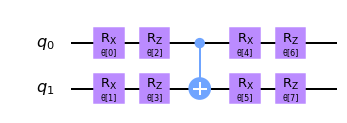

In [83]:
ansatz = TwoLocal(num_qubits=2,
                  rotation_blocks=['rx','rz'],
                  entanglement_blocks='cx',
                  entanglement='full',
                  reps=1)
ansatz.draw()

In [96]:
optimizer = SLSQP(maxiter=100)

In [97]:
Op = PauliOp(Pauli(label='II'), 0.5) - PauliOp(Pauli(label='XX'), 0.5) - 0.5*PauliOp(Pauli(label='YY')) + 0.5*PauliOp(Pauli(label='ZZ'))

In [98]:
# Op = PrimitiveOp(primitive=[[1,0],[0,1]], coeff=2.)
# xx = Pauli(label='XX')
# yy = Pauli(label='YY')
# zz = Pauli(label='ZZ')
# ii = Pauli(label='II')
# Op = ListOp([zz,yy,xx, ii], coeff=[0.5,-0.5,-0.5,0.5])
vqe = VQE(Op, ansatz, optimizer)

In [99]:
backend = Aer.get_backend("statevector_simulator")
vqe_result = np.real(vqe.run(backend)['eigenvalue'] )
vqe_result

-0.9999999968151002

In [101]:
np.min(np.linalg.eig(Op.to_matrix())[0])

(-0.9999999999999999+0j)

In [90]:
Op.to_matrix()

array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j]])